In [1]:
%pylab inline
import pathlib
import cv2

Populating the interactive namespace from numpy and matplotlib


# Transfer image to black & white

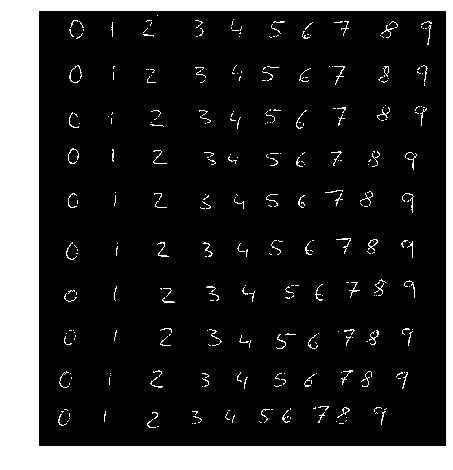

In [31]:
th_val = 180

image_path = pathlib.Path("img")
input_img_path = image_path / "input.bmp"
bw_img_path = image_path / "bw.bmp"

color_complete = cv2.imread(str(input_img_path))
gray_complete = cv2.imread(str(input_img_path), cv2.IMREAD_GRAYSCALE)

(thresh, gray_complete) = cv2.threshold(
    255 - gray_complete, th_val, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU
)
cv2.imwrite(str(bw_img_path), gray_complete)

figsize(12, 8)
imshow(gray_complete, cmap="gray")
axis("off");

In [9]:
rect = (50, 50)
w, h = gray_complete.shape

content_map = np.zeros((w, h))

# find rectangles with content
for x in range(0, w, rect[0]):
    for y in range(0, h, rect[1]):
        x1 = x + rect[0]
        y1 = x + rect[1]
        
        if x1 < w and y1 < h:
            
            if (any(gray_complete[x+1:x1-1, y+1:y1-1])
            and not (any(gray_complete[x:x1, y]) or
                     any(gray_complete[x:x1, y1]) or
                     any(gray_complete[x, y:y1]) or
                     any(gray_complete[x1, y:y1]))):
                content_map[x:x1, y:y1] = 1
        

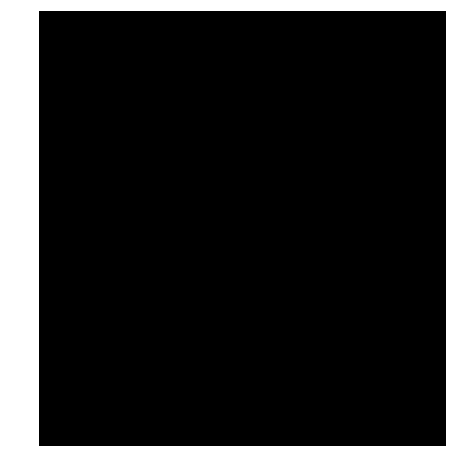

In [10]:
figsize(12, 8)
imshow(content_map, cmap="gray")
axis("off");

# Using OpenCVs findContours function

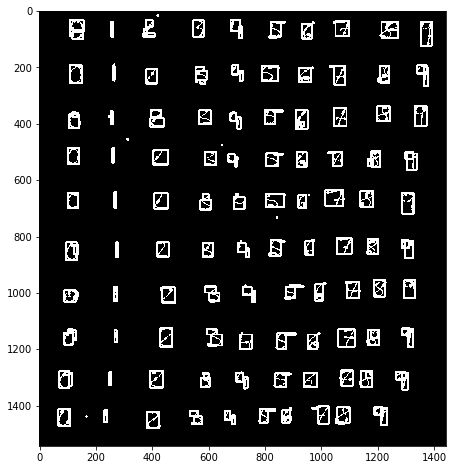

In [81]:
im = cv2.imread(str(input_img_path), cv2.IMREAD_GRAYSCALE)
ret, thresh = cv2.threshold(
    255 - im, th_val, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU
)

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# im_contours = cv2.drawContours(thresh, contours, -1, (255,255,255),1)

for cont in contours:
    x,y,w,h = cv2.boundingRect(cont)
    thresh = cv2.rectangle(thresh, (x,y),(x+w,y+h),(255, 255, 255), 5)    
    
imshow(thresh, cmap="gray")

* https://www.ritchieng.com/machine-learning-photo-ocr/#sliding-windows
* https://stackoverflow.com/questions/47273372/character-segmentation-and-recognition-for-unevenly-spaced-digits

5 (876, 1437, 17, 16)
6 (547, 1437, 30, 27)
11 (382, 1422, 43, 57)
12 (660, 1421, 22, 29)
13 (535, 1419, 28, 16)
17 (862, 1414, 27, 47)
19 (779, 1411, 32, 51)
20 (68, 1411, 42, 61)
21 (71, 1413, 37, 56)
24 (1207, 1407, 25, 62)
26 (1055, 1405, 46, 61)
27 (1188, 1404, 29, 28)
31 (989, 1401, 37, 63)
36 (569, 1303, 35, 32)
44 (939, 1283, 48, 49)
46 (836, 1283, 40, 50)
47 (578, 1283, 24, 21)
48 (1287, 1282, 20, 62)
50 (1265, 1280, 34, 24)
53 (86, 1280, 22, 16)
54 (700, 1278, 27, 37)
56 (1141, 1277, 40, 57)
57 (1158, 1279, 20, 24)
59 (72, 1276, 44, 62)
60 (394, 1275, 45, 61)
61 (1068, 1274, 44, 55)
74 (952, 1147, 35, 52)
76 (607, 1146, 40, 41)
78 (710, 1144, 44, 53)
80 (839, 1143, 37, 56)
85 (1164, 1130, 41, 54)
87 (1059, 1129, 59, 62)
88 (593, 1129, 36, 18)
89 (89, 1129, 31, 56)
91 (1306, 1127, 19, 64)
93 (1285, 1125, 29, 24)
94 (427, 1125, 45, 65)
98 (986, 1003, 19, 16)
99 (602, 1001, 37, 28)
101 (436, 990, 46, 45)
102 (90, 990, 46, 41)
104 (92, 992, 41, 37)
109 (721, 978, 36, 28)
110 (873

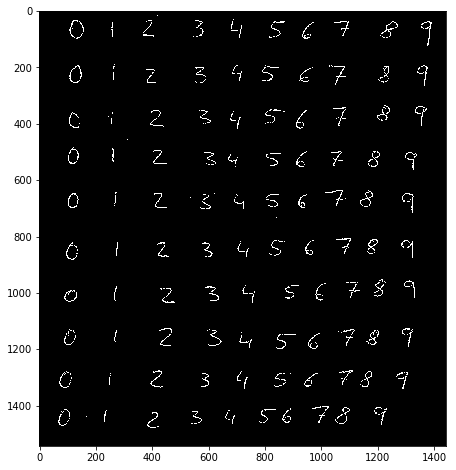

In [87]:
img = cv2.imread(str(input_img_path))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

blur = cv2.GaussianBlur(gray,(3,3), 0)
thresh = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY_INV, 7,10)

imshow(thresh, cmap="gray")
# thresh = clear_border(thresh)

# find contours in the thresholded image, then initialize the
# list of group locations
clone = np.dstack([gray.copy()] * 3)
groupCnts = cv2.findContours(thresh.copy(), cv2.RETR_TREE,
    cv2.CHAIN_APPROX_SIMPLE)
groupCnts = groupCnts[0]
groupLocs = []

clone = np.dstack([gray.copy()] * 3)
# loop over the group contours
for (i, c) in enumerate(groupCnts):
    # compute the bounding box of the contour
    (x, y, w, h) = cv2.boundingRect(c)
    # only accept the contour region as a grouping of characters if
    # the ROI is sufficiently large
    if w >= 15 and h >= 15:
        print (i, (x, y, w, h))
        cv2.rectangle(clone, (x,y), (x+w, y+h), (255,0,0), 1)
        groupLocs.append((x, y, w, h))